In [57]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [66]:
book_data = pd.read_csv("cleaned_data/cleaned_book_data.csv")
ratings_data = pd.read_csv("cleaned_data/cleaned_ratings.csv")

## Calculating Mean Scores

In [67]:
average_ratings = ratings_data.groupby("Title")["review/score"].mean()
books_merged = pd.merge(book_data, average_ratings, on='Title', how='left')
books_merged.head(10)

,Title,description,authors,publisher,publishedDate,categories,ratingsCount,review/score
0,Night World: Daughters Of Darkness,"""There’s something strange about the new girls...",['L.J. Smith'],Simon and Schuster,2016-12-06,['Juvenile Fiction'],11.0,4.768657
1,The Rabbi's Cat,Gaining the ability to speak after swallowing ...,['Joann Sfar'],Pantheon,2005,['Comics & Graphic Novels'],25.0,4.425000
2,From Potter's Field,"The sixth book in the Kay Scarpetta series, fr...",['Patricia Cornwell'],Hachette UK,2008-09-04,['Fiction'],19.0,3.783439
3,Economics in one lesson,"With over a million copies sold, Economics in ...",['Henry Hazlitt'],Currency,2010-08-11,['Business & Economics'],18.0,4.363086
4,Plain And Simple - A Woman's Journey To The Amish,"""I had an obsession with the Amish. Plan and s...",['Sue Bender'],Harper Collins,2009-03-17,['Religion'],11.0,3.527273
5,The Castle in the Attic,The classic children's story about a young boy...,['Elizabeth Winthrop'],Holiday House,2012-05-15,['Juvenile Fiction'],21.0,4.474576
6,Dumb witness,An elderly spinster has been poisoned in her c...,['AGATHA. CHRISTIE'],HarperCollins,2018-03-22,NaN,21.0,4.307692
7,Jean Paul Sartres No Exit and the Flies,English translations of four plays which drama...,['Jean-Paul Sartre'],Vintage,1976,['Drama'],22.0,5.000000
8,Mothman Prophecies,This true account of the aliens who invaded th...,['John A. Keel'],Hachette UK,2013-03-28,"['Body, Mind & Spirit']",13.0,3.439759
9,The Gods of Mars,The Barsoom series continues: John Carter retu...,['Edgar Rice Burroughs'],Open Road Media,2020-03-17,['Fiction'],26.0,4.214286


In [68]:
books_merged.to_csv("cleaned_data/books_withRatings.csv", index = False)

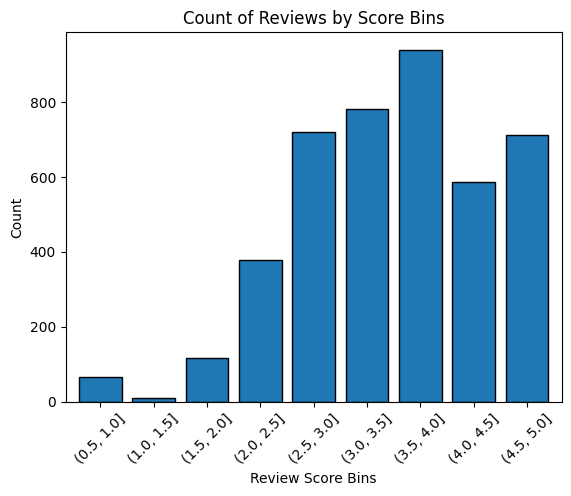

In [61]:
bins = [x / 2.0 for x in range(1, 11)]

books_merged['score_bin'] = pd.cut(books_merged['review/score'], bins)
bin_counts = books_merged['score_bin'].value_counts().sort_index()

# Plot the bar graph
bin_counts.plot(kind='bar', edgecolor='black', width=0.8)

# Customize the plot
plt.title('Count of Reviews by Score Bins')
plt.xlabel('Review Score Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Show the plot
plt.show()

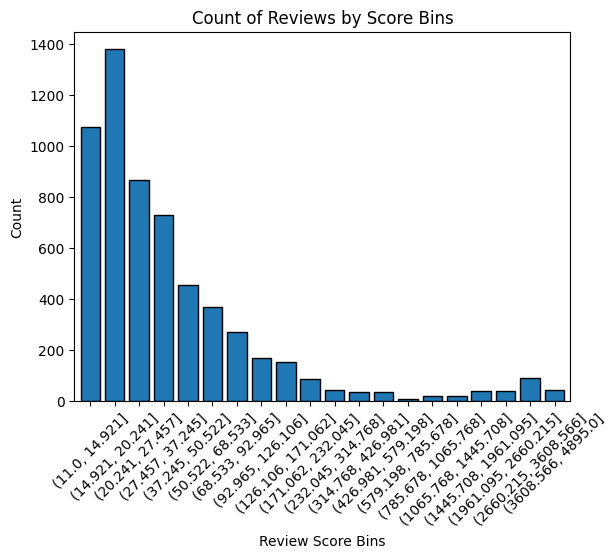

In [62]:
min_count = np.log10(books_merged['ratingsCount'].min())
max_count = np.log10(books_merged['ratingsCount'].max())

# Create 20 logarithmically spaced bins between min and max values
bins = np.logspace(min_count, max_count, 21)
books_merged['score_bin'] = pd.cut(books_merged['ratingsCount'], bins)
bin_counts = books_merged['score_bin'].value_counts().sort_index()

# Plot the bar graph
bin_counts.plot(kind='bar', edgecolor='black', width=0.8)

# Customize the plot
plt.title('Count of Reviews by Score Bins')
plt.xlabel('Review Score Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()